# *Emergency - 911 Calls Project*

## The data contains the following fields:
* lat : String variable, Latitude
* lng : String variable , Longitude
* desc : String variable, Description of the Emergency Call
* zip : String variable, Zipcode
* timeStamp : String variable, YYY-MM-DD HH:MM:SS
* twp : String variable, Township
* addr : String variable, Address
* e : String variable, Dummy variable (always 1)

# Data and Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Read in the csv file as a dataframe and check the info() and the head of the dataframe.
data = pd.read_csv('911.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


# Basic Questions

In [5]:
# What are top five zipcodes for 911 calls?
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# What are the top 5 townships (twp) for 911 calls?
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# How many unique title codes are there?
data['title'].nunique()

110

# Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS,Fire and Traffic. Create a new column called "Reason" that contains this string value.

In [8]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [9]:
#The most common Reason for a 911 call based off of this new column.
data['Reason'].value_counts() 

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

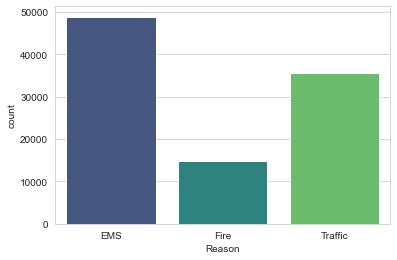

In [10]:
sns.countplot(x='Reason', data = data, palette = 'viridis') # using Seaborn to create the countplot

As we can see most of the calls are for EMS.

Now let us begin to focus on time information.

In [11]:
type(data['timeStamp'].iloc[0])

str

As we can see these timestamps are still strings. Using pd.to_datetime we can convert the column from strings to DateTime objects.

In [12]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

Now that the timestamp column are actually DateTime objects, we can create 3 new columns called Hour, Month and Day of Week.

In [13]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [14]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3


In [15]:
# Using .map() to map the actual string names to the day of the week.
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [16]:
data['Day of Week'] = data['Day of Week'].map(dmap)

In [17]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


Now let's do some visualizations. First we'll create a countplot of the Day of Week and Month column with the hue based off of the Reason column.

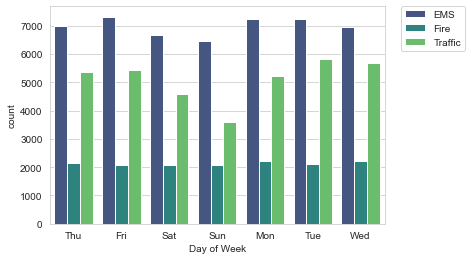

In [18]:
sns.countplot(x='Day of Week',data=data,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

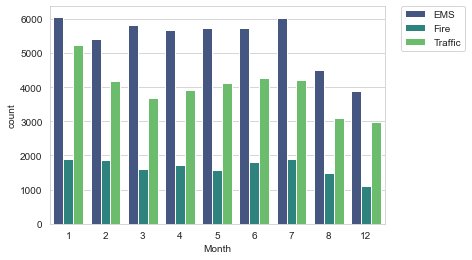

In [19]:
sns.countplot(x='Month',data=data,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that some months are missing! 9, 10 and 11 are not there. Using pandas we will plot the information in another way by creating a groupby object called byMonth, where we group the DataFrame by the month column and use the count() method for aggregation.

In [20]:
byMonth = data.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

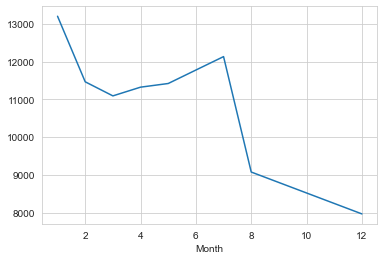

In [21]:
byMonth['twp'].plot()

Now let's create a Date column to plot counts of 911 calls.

In [22]:
data['Date'] = data['timeStamp'].apply(lambda time: time.date())
data['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

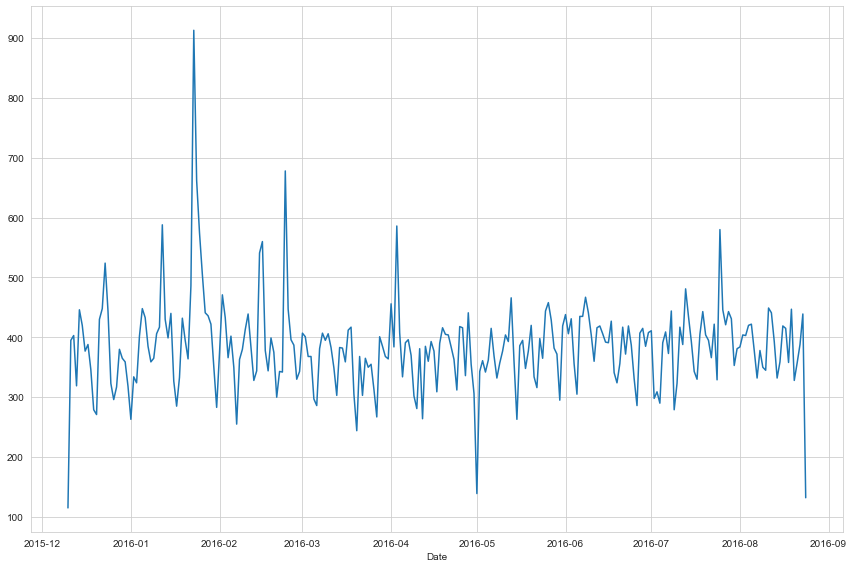

In [23]:
plt.figure(figsize=(12,8))
data.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Now we will create 3 separate plots with each plot representing a Reason for the 911 call.

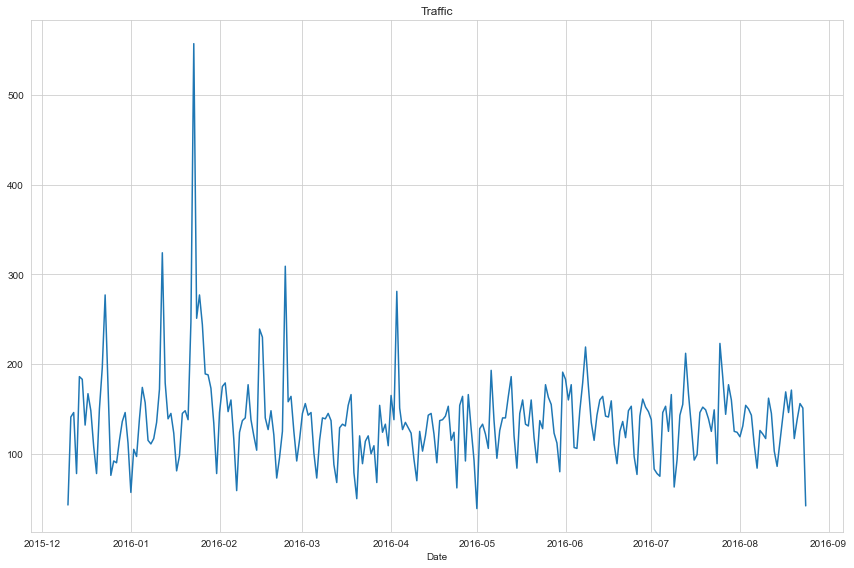

In [24]:
plt.figure(figsize=(12,8))
data[data['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

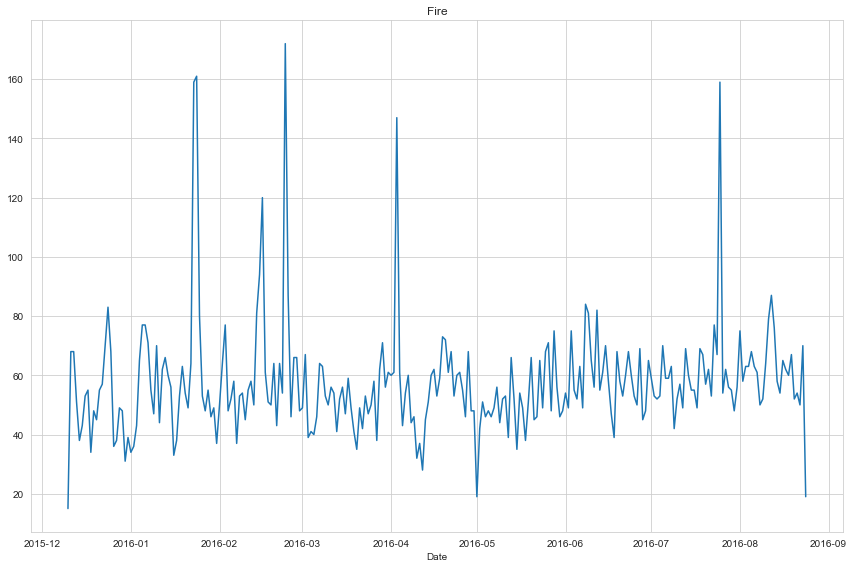

In [25]:
plt.figure(figsize=(12,8))
data[data['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

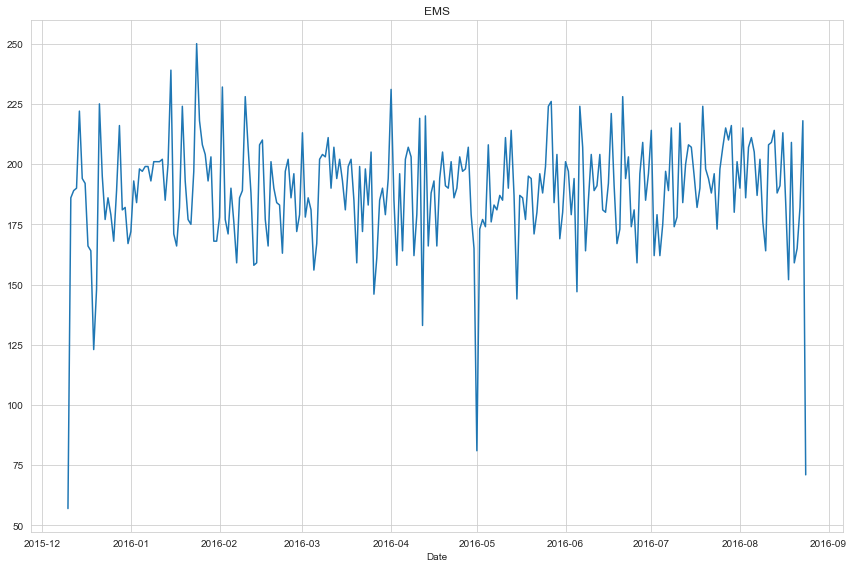

In [26]:
plt.figure(figsize=(12,8))
data[data['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

 Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [27]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

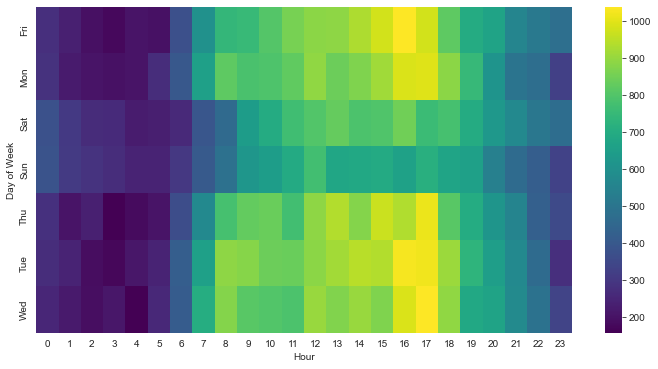

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

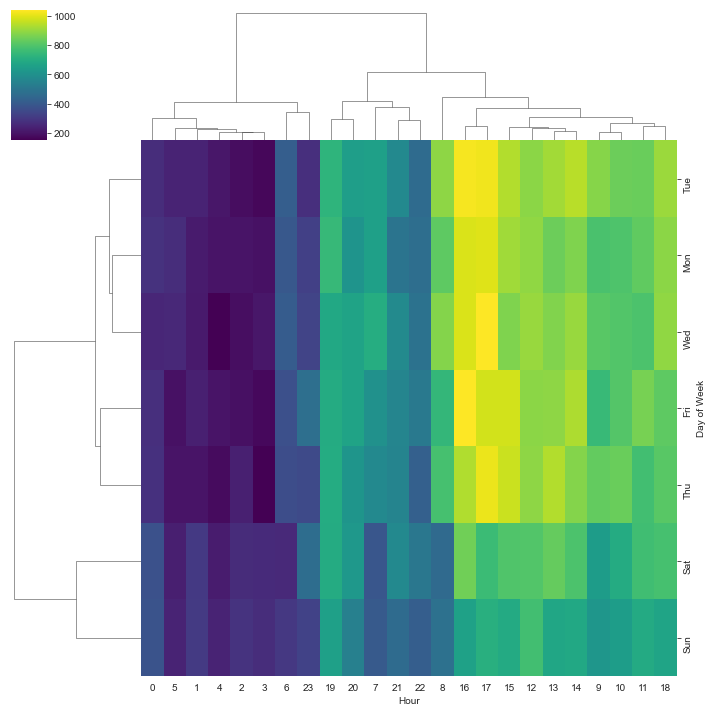

In [29]:
sns.clustermap(dayHour,cmap='viridis')

Now we'll repeat the same plots and operations, for a DataFrame that shows the Month as the column.

In [30]:
dayMonth = data.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

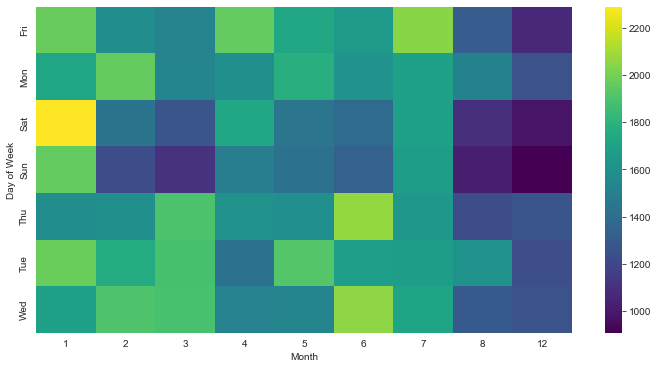

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

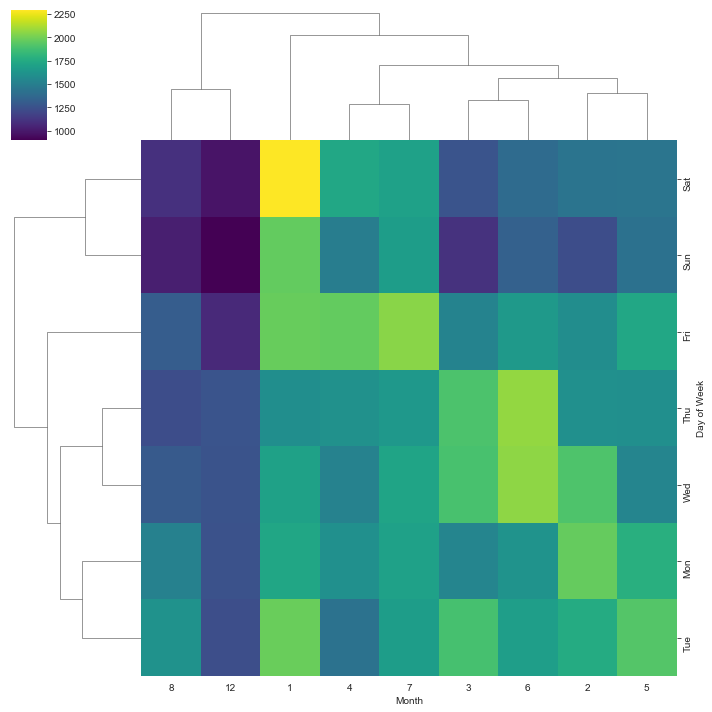

In [32]:
sns.clustermap(dayMonth,cmap='viridis')

We can see that most of the calls happened on the spring, summer, winter afternoon, and from Monday to Friday.

# Summary

This project was about 911 Emergency Calls. The most common Reason for a 911 Call is for emergency medical service.

January is the month when most of the calls happen around afternoon hours.
